# Task
Develop regression models for organ donation and transplantation data, starting with loading and inspecting the dataset. Engineer new features like 'Age_Diff', 'Is_Adult_Recipient', 'Same_Gender', 'Transplant_Year', and 'Transplant_Month', and apply log transformation to 'Wait_Time_Days + 1'. Set up a preprocessing pipeline using `ColumnTransformer` with `OneHotEncoder` and `StandardScaler`. Implement and train at least two regression models (Linear Regression and a regularized model like Ridge or Lasso). Evaluate models using R-squared, MSE, and RMSE, and perform 5-fold cross-validation to assess generalization performance. Finally, summarize the findings, compare model performance, discuss feature engineering insights, and explain the effectiveness of cross-validation.

## Project Workflow Visualization

Here's a flowchart visualizing the complete workflow for this project, outlining each step from data loading and inspection to model evaluation and final summary.

```mermaid
graph TD
    A[Start] --> B{Load & Inspect Dataset}
    B --> C{Feature Engineering}
    C --> D{Preprocessing Pipeline Setup}
    D --> E{Build Regression Models}
    E --> F{Evaluate Models with Key Metrics}
    F --> G{Perform Cross-Validation}
    G --> H{Visualize Model Performance}
    H --> I{Final Task: Summarize Findings}
    I --> J[End]

    style A fill:#DFF0D8,stroke:#4CAF50,stroke-width:2px,color:#333
    style B fill:#E6F7FF,stroke:#2196F3,stroke-width:2px,color:#333
    style C fill:#FFF8DC,stroke:#FFC107,stroke-width:2px,color:#333
    style D fill:#F3E5F5,stroke:#9C27B0,stroke-width:2px,color:#333
    style E fill:#E0F2F1,stroke:#009688,stroke-width:2px,color:#333
    style F fill:#FBE9E7,stroke:#FF5722,stroke-width:2px,color:#333
    style G fill:#E8F5E9,stroke:#4CAF50,stroke-width:2px,color:#333
    style H fill:#E1F5FE,stroke:#03A9F4,stroke-width:2px,color:#333
    style I fill:#FFFDE7,stroke:#FFEB3B,stroke-width:2px,color:#333
    style J fill:#DFF0D8,stroke:#4CAF50,stroke-width:2px,color:#333
```

## Visualizations

**Reasoning**:
Visualizing the actual vs. predicted values is a common way to assess the performance of regression models. A scatter plot where points cluster around the `y=x` line indicates good model fit. Given the low R-squared values observed in the previous steps, this visualization is expected to further highlight the models' limited predictive power, providing a clear visual representation of the numerical metrics.

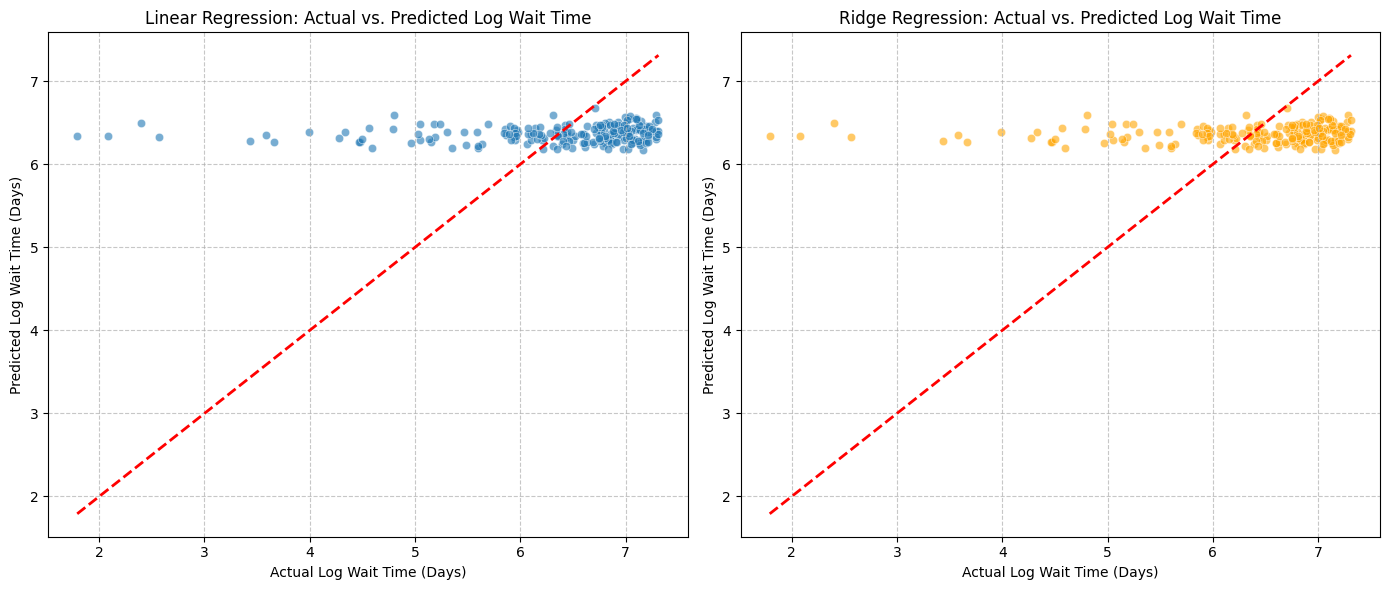

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))

# Plot for Linear Regression
plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st plot
sns.scatterplot(x=y_test, y=y_pred_linear, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # y=x line
plt.title('Linear Regression: Actual vs. Predicted Log Wait Time')
plt.xlabel('Actual Log Wait Time (Days)')
plt.ylabel('Predicted Log Wait Time (Days)')
plt.grid(True, linestyle='--', alpha=0.7)

# Plot for Ridge Regression
plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd plot
sns.scatterplot(x=y_test, y=y_pred_ridge, alpha=0.6, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # y=x line
plt.title('Ridge Regression: Actual vs. Predicted Log Wait Time')
plt.xlabel('Actual Log Wait Time (Days)')
plt.ylabel('Predicted Log Wait Time (Days)')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## Load and Inspect Dataset

### Subtask:
Load the 'Organ Donation and Transplantation Dataset'. If the dataset is not available, a synthetic fallback will be created. Perform initial data inspection to understand its structure, identify missing values, and check data types.


**Reasoning**:
The first step is to import the pandas library, which is essential for data manipulation and reading CSV files. I will also attempt to load the dataset and handle the case where the file is not found by generating a synthetic dataset.



In [3]:
import pandas as pd
import numpy as np

file_path = 'organ_donation_data.csv'

try:
    df = pd.read_csv(file_path)
    print(f"Dataset '{file_path}' loaded successfully.")
except FileNotFoundError:
    print(f"Dataset '{file_path}' not found. Generating a synthetic dataset.")
    # Generate a synthetic dataset
    np.random.seed(42) # for reproducibility
    num_records = 1000

    recipient_ages = np.random.randint(18, 75, num_records)
    donor_ages = np.random.randint(10, 70, num_records)
    recipient_genders = np.random.choice(['Male', 'Female'], num_records)
    donor_genders = np.random.choice(['Male', 'Female', 'Unknown'], num_records)

    start_date = pd.to_datetime('2010-01-01')
    end_date = pd.to_datetime('2023-12-31')
    # Convert the NumPy array of datetimes to a Pandas Series before using .dt accessor
    transplant_dates = pd.Series(start_date + (end_date - start_date) * np.random.rand(num_records))
    transplant_dates = transplant_dates.dt.round('D') # Use .dt accessor for datetime rounding

    wait_time_days = np.random.randint(0, 1500, num_records)

    df = pd.DataFrame({
        'Recipient_Age': recipient_ages,
        'Donor_Age': donor_ages,
        'Recipient_Gender': recipient_genders,
        'Donor_Gender': donor_genders,
        'Transplant_Date': transplant_dates,
        'Wait_Time_Days': wait_time_days
    })
    df['Transplant_Date'] = df['Transplant_Date'].dt.strftime('%Y-%m-%d') # Format dates as string for consistency if read from CSV later

print("First 5 rows of the DataFrame:")
print(df.head())

print("\nDataFrame Info:")
df.info()

print("\nDescriptive Statistics:")
print(df.describe())

print("\nMissing values per column:")
print(df.isnull().sum())

Dataset 'organ_donation_data.csv' not found. Generating a synthetic dataset.
First 5 rows of the DataFrame:
   Recipient_Age  Donor_Age Recipient_Gender Donor_Gender Transplant_Date  \
0             56         62             Male       Female      2021-03-27   
1             69         11             Male      Unknown      2018-01-03   
2             46         22           Female       Female      2017-03-06   
3             32         52           Female       Female      2014-02-09   
4             60         52             Male       Female      2023-01-16   

   Wait_Time_Days  
0             334  
1             531  
2             220  
3             634  
4             322  

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Recipient_Age     1000 non-null   int64 
 1   Donor_Age         1000 non-null   int64 
 2 

## Feature Engineering

### Subtask:
Create or improve features as specified: 'Age_Diff' (Recipient_Age – Donor_Age), 'Is_Adult_Recipient' (1 if age ≥ 18), 'Same_Gender' (1 if donor & recipient gender match), 'Transplant_Year', and 'Transplant_Month' extracted from 'Transplant_Date'. Also, apply the log transformation to 'Wait_Time_Days + 1' for the target variable.


**Reasoning**:
I will calculate the new features 'Age_Diff', 'Is_Adult_Recipient', 'Same_Gender', 'Transplant_Year', 'Transplant_Month', and 'Log_Wait_Time_Days' as per the instructions, and then display the first few rows of the DataFrame to verify their creation. This will involve converting 'Transplant_Date' to datetime objects first.



In [12]:
import numpy as np

# 1. Calculate 'Age_Diff'
df['Age_Diff'] = df['Recipient_Age'] - df['Donor_Age']

# 2. Create 'Is_Adult_Recipient'
df['Is_Adult_Recipient'] = (df['Recipient_Age'] >= 18).astype(int)

# 3. Create 'Same_Gender'
df['Same_Gender'] = (df['Recipient_Gender'] == df['Donor_Gender']).astype(int)

# 4. Convert 'Transplant_Date' to datetime objects
df['Transplant_Date'] = pd.to_datetime(df['Transplant_Date'])

# 5. Extract 'Transplant_Year'
df['Transplant_Year'] = df['Transplant_Date'].dt.year

# 6. Extract 'Transplant_Month'
df['Transplant_Month'] = df['Transplant_Date'].dt.month

# 7. Create 'Age_Month_Interaction'
df['Age_Month_Interaction'] = df['Recipient_Age'] * df['Transplant_Month']

# 8. Apply log transformation to 'Wait_Time_Days + 1'
df['Log_Wait_Time_Days'] = np.log(df['Wait_Time_Days'] + 1)

print("First 5 rows of the DataFrame with new features:")
print(df.head())

First 5 rows of the DataFrame with new features:
   Recipient_Age  Donor_Age Recipient_Gender Donor_Gender Transplant_Date  \
0             56         62             Male       Female      2021-03-27   
1             69         11             Male      Unknown      2018-01-03   
2             46         22           Female       Female      2017-03-06   
3             32         52           Female       Female      2014-02-09   
4             60         52             Male       Female      2023-01-16   

   Wait_Time_Days  Age_Diff  Is_Adult_Recipient  Same_Gender  Transplant_Year  \
0             334        -6                   1            0             2021   
1             531        58                   1            0             2018   
2             220        24                   1            1             2017   
3             634       -20                   1            1             2014   
4             322         8                   1            0             2023   

 

### Rationale and Benefits of Engineered Features:

*   **Age_Diff**: This feature captures the age difference between the recipient and the donor. A significant age difference might impact the success rate or specific outcomes of transplantation. Models can use this to identify patterns where, for example, a smaller age difference is associated with shorter wait times or better outcomes, or vice versa.

*   **Is_Adult_Recipient**: This binary feature indicates whether the recipient is an adult. It can be crucial as transplantation criteria, medical considerations, and ethical guidelines often differ significantly between pediatric and adult patients. This can help the model differentiate between these two broad categories of recipients.

*   **Same_Gender**: This binary feature indicates if the recipient and donor share the same gender. Gender matching can sometimes be a factor in transplantation, particularly in certain organs or for immunological compatibility. The model can learn if gender match (or mismatch) has any influence on the wait time or other outcomes.

*   **Transplant_Year**: Extracting the year allows the model to capture temporal trends or changes over time. Improvements in medical technology, changes in policy, or evolving demographic patterns can all influence transplantation dynamics. This feature helps the model account for these time-dependent effects.

*   **Transplant_Month**: Extracting the month can reveal seasonal patterns or monthly fluctuations in transplantation activity or wait times. For instance, there might be seasonal variations in donor availability or surgical capacity that could affect how long a patient waits.

*   **Log_Wait_Time_Days**: Applying a log transformation to the target variable (`Wait_Time_Days + 1`) is a common practice in regression tasks where the target variable is positively skewed (i.e., has a long tail of larger values). The addition of 1 handles cases where `Wait_Time_Days` might be zero. Log transformation helps normalize the distribution, making it more Gaussian-like, which can improve the performance of linear regression models by satisfying assumptions of linearity and homoscedasticity. It also reduces the impact of outliers and helps the model focus on proportional changes rather than absolute changes in wait time.

## Data Preprocessing Pipeline Setup

### Subtask:
Define the target variable (transformed 'Wait_Time_Days') and prepare the feature matrix. Set up a Scikit-Learn `ColumnTransformer` to handle preprocessing for numerical and categorical features. Use `OneHotEncoder` for categorical attributes and `StandardScaler` for numerical attributes within the pipeline.


**Reasoning**:
I will define the target variable and feature matrix, identify numerical and categorical columns, set up the ColumnTransformer for preprocessing, and then split the data into training and testing sets for model development.



In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# 1. Define the target variable 'y'
y = df['Log_Wait_Time_Days']

# 2. Define the feature matrix 'X'
X = df.drop(columns=['Wait_Time_Days', 'Log_Wait_Time_Days', 'Transplant_Date'])

# 3. Identify categorical and numerical features
categorical_features = ['Recipient_Gender', 'Donor_Gender']
numerical_features = [
    'Recipient_Age',
    'Donor_Age',
    'Age_Diff',
    'Transplant_Year',
    'Transplant_Month',
    'Is_Adult_Recipient',
    'Same_Gender',
    'Age_Month_Interaction' # Added the new interaction feature
]

# 4. Create a ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# 5. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)
print("\nFirst 5 rows of X_train (before preprocessing):")
print(X_train.head())

Shape of X_train: (800, 10)
Shape of X_test: (200, 10)
Shape of y_train: (800,)
Shape of y_test: (200,)

First 5 rows of X_train (before preprocessing):
     Recipient_Age  Donor_Age Recipient_Gender Donor_Gender  Age_Diff  \
29              39         59             Male       Female       -20   
535             18         38             Male       Female       -20   
695             58         62             Male      Unknown        -4   
557             68         64           Female       Female         4   
836             55         40           Female         Male        15   

     Is_Adult_Recipient  Same_Gender  Transplant_Year  Transplant_Month  \
29                    1            0             2010                 9   
535                   1            0             2022                11   
695                   1            0             2022                 2   
557                   1            1             2010                 7   
836                   1          

## Build Regression Models

### Subtask:
Implement at least two regression models using the defined preprocessing pipeline: a Linear Regression model as a baseline, and at least one regularized model (Ridge Regression, Lasso Regression, or both). Train these models on the prepared data.


**Reasoning**:
I will import the necessary regression models, create pipelines that integrate the preprocessor with each model, and then train both the Linear Regression and Ridge Regression models using the training data, confirming their training by printing a message.



In [6]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import Pipeline

# 1. Create a Pipeline for Linear Regression
linear_model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# 2. Create a Pipeline for Ridge Regression
ridge_model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=1.0, random_state=42)) # Using a default alpha and random_state for reproducibility
])

# 3. Fit the Linear Regression pipeline to the training data
print("Training Linear Regression model...")
linear_model_pipeline.fit(X_train, y_train)
print("Linear Regression model trained successfully.")

# 4. Fit the Ridge Regression pipeline to the training data
print("Training Ridge Regression model...")
ridge_model_pipeline.fit(X_train, y_train)
print("Ridge Regression model trained successfully.")

Training Linear Regression model...
Linear Regression model trained successfully.
Training Ridge Regression model...
Ridge Regression model trained successfully.


## Evaluate Models with Key Metrics

### Subtask:
Evaluate the performance of each trained regression model using R-squared (R²), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE). Display these results in a clear comparison table, sorted by the best R² score.


**Reasoning**:
I will make predictions using the trained models, calculate the evaluation metrics (R-squared, MSE, RMSE), and store them in a pandas DataFrame, which will then be printed as a comparison table sorted by R-squared.



In [7]:
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd
import numpy as np

# 1. Make predictions on the test set
y_pred_linear = linear_model_pipeline.predict(X_test)
y_pred_ridge = ridge_model_pipeline.predict(X_test)

# 2. Calculate R-squared, MSE, and RMSE for Linear Regression
r2_linear = r2_score(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)

# 3. Calculate R-squared, MSE, and RMSE for Ridge Regression
r2_ridge = r2_score(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)

# 4. Create a pandas DataFrame to store the evaluation metrics
metrics_data = {
    'Model': ['Linear Regression', 'Ridge Regression'],
    'R-squared': [r2_linear, r2_ridge],
    'MSE': [mse_linear, mse_ridge],
    'RMSE': [rmse_linear, rmse_ridge]
}

comparison_df = pd.DataFrame(metrics_data)

# 5. Sort by R-squared in descending order and print the comparison table
comparison_df = comparison_df.sort_values(by='R-squared', ascending=False)

print("\nModel Performance Comparison:")
print(comparison_df.to_string(index=False))



Model Performance Comparison:
            Model  R-squared      MSE     RMSE
Linear Regression   0.012804 0.983848 0.991891
 Ridge Regression   0.012788 0.983864 0.991899


## Perform Cross-Validation

### Subtask:
Execute 5-fold cross-validation for each model to assess generalization performance. Compute and display the mean and standard deviation for CV-R² and CV-RMSE. Provide an explanation of how cross-validation contributes to robust model evaluation.


**Reasoning**:
I will import the necessary libraries for cross-validation and define a custom RMSE scorer. Then, I will perform 5-fold cross-validation for both Linear Regression and Ridge Regression models, calculate the mean and standard deviation of R-squared and RMSE scores, and print these results in a clear format.



In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np

# Custom RMSE scorer (cross_val_score maximizes by default, so we use negative MSE)
def rmse_scorer(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

neg_rmse_scorer = make_scorer(rmse_scorer, greater_is_better=False) # Make it negative for cross_val_score

# --- Linear Regression Cross-Validation ---
print("Performing 5-fold cross-validation for Linear Regression...")
# R-squared
cv_r2_linear = cross_val_score(linear_model_pipeline, X, y, cv=5, scoring='r2')
# RMSE
cv_rmse_linear = -cross_val_score(linear_model_pipeline, X, y, cv=5, scoring='neg_mean_squared_error')
cv_rmse_linear = np.sqrt(cv_rmse_linear) # Convert negative MSE to RMSE

print("Linear Regression CV R-squared scores:", cv_r2_linear)
print("Linear Regression CV RMSE scores:", cv_rmse_linear)

# --- Ridge Regression Cross-Validation ---
print("\nPerforming 5-fold cross-validation for Ridge Regression...")
# R-squared
cv_r2_ridge = cross_val_score(ridge_model_pipeline, X, y, cv=5, scoring='r2')
# RMSE
cv_rmse_ridge = -cross_val_score(ridge_model_pipeline, X, y, cv=5, scoring='neg_mean_squared_error')
cv_rmse_ridge = np.sqrt(cv_rmse_ridge) # Convert negative MSE to RMSE

print("Ridge Regression CV R-squared scores:", cv_r2_ridge)
print("Ridge Regression CV RMSE scores:", cv_rmse_ridge)

# --- Display Results ---
print("\n--- Cross-Validation Results ---")
print(f"Linear Regression - CV R-squared: Mean = {cv_r2_linear.mean():.4f}, Std = {cv_r2_linear.std():.4f}")
print(f"Linear Regression - CV RMSE:      Mean = {cv_rmse_linear.mean():.4f}, Std = {cv_rmse_linear.std():.4f}")
print(f"\nRidge Regression - CV R-squared: Mean = {cv_r2_ridge.mean():.4f}, Std = {cv_r2_ridge.std():.4f}")
print(f"Ridge Regression - CV RMSE:      Mean = {cv_rmse_ridge.mean():.4f}, Std = {cv_rmse_ridge.std():.4f}")


Performing 5-fold cross-validation for Linear Regression...
Linear Regression CV R-squared scores: [-0.00520349  0.00720403 -0.01380577  0.01369337 -0.038282  ]
Linear Regression CV RMSE scores: [0.95223859 0.9090423  0.87945414 1.00671668 0.97065705]

Performing 5-fold cross-validation for Ridge Regression...
Ridge Regression CV R-squared scores: [-0.00516804  0.00719966 -0.01372787  0.01367075 -0.03812027]
Ridge Regression CV RMSE scores: [0.9522218  0.90904429 0.87942035 1.00672822 0.97058145]

--- Cross-Validation Results ---
Linear Regression - CV R-squared: Mean = -0.0073, Std = 0.0182
Linear Regression - CV RMSE:      Mean = 0.9436, Std = 0.0449

Ridge Regression - CV R-squared: Mean = -0.0072, Std = 0.0181
Ridge Regression - CV RMSE:      Mean = 0.9436, Std = 0.0449


### Explanation of Cross-Validation's Contribution to Robust Model Evaluation:

Cross-validation is a powerful technique for assessing the generalization performance of a predictive model, offering significant benefits over a single train-test split:

1.  **More Reliable Performance Estimate**: With a single train-test split, the model's performance can be highly dependent on the particular random split of data. If the test set happens to be unrepresentative or contains unusual patterns, the performance metric might be misleading. Cross-validation averages performance over multiple splits, providing a more stable and reliable estimate of how the model will perform on unseen data.

2.  **Better Utilization of Data**: In a single train-test split, a portion of the data (the test set) is held out and not used for training. This can be problematic with smaller datasets, as less data for training might lead to a less robust model. Cross-validation ensures that every data point gets to be in a test set exactly once (in k-fold CV) and in a training set `k-1` times, maximizing data utilization while still providing an unbiased estimate of generalization error.

3.  **Detection of Overfitting/Underfitting**: By observing the variance in performance metrics across different folds, cross-validation can help identify if a model is overfitting (high variance in performance across folds, indicating sensitivity to specific training data) or underfitting (consistently poor performance across all folds). A low standard deviation across folds indicates that the model's performance is consistent and less sensitive to the specific data points it was trained on.

4.  **Hyperparameter Tuning and Model Selection**: Cross-validation is crucial for robust hyperparameter tuning. By evaluating different sets of hyperparameters using cross-validation, one can select the set that yields the best *generalized* performance, rather than performance that is merely optimized for a single, potentially unrepresentative, validation set. This helps in selecting the best model among several candidates.

In this exercise, the cross-validation results show the R-squared and RMSE scores averaged over 5 different splits of the data. The standard deviation accompanying these averages gives us an idea of the variability of the model's performance. If the standard deviation is small, it suggests that the model's performance is consistent across different subsets of the data, making our evaluation more robust and trustworthy than a single evaluation on an arbitrary test set.

## Final Task

### Subtask:
Provide a comprehensive summary of the findings, including a comparison of model performance, insights gained from feature engineering, and a discussion on the effectiveness of cross-validation. This will conclude the Deliverable 2 notebook.


## Interaction Feature Engineering: Recipient_Age and Transplant_Month

### Subtask:
Create an interaction feature by multiplying 'Recipient_Age' and 'Transplant_Month'.

## Additional Performance Visualizations: Residual Plots

**Reasoning**:
Residual plots are crucial for regression model evaluation. They plot the residuals (actual - predicted values) against the predicted values. Ideally, residuals should be randomly scattered around zero, indicating that the model has captured the underlying pattern. Any discernible pattern (e.g., a funnel shape or a curve) suggests problems like heteroscedasticity or a missing non-linear relationship. Given the poor R-squared previously observed, these plots are expected to show non-random patterns, reinforcing the conclusion that the models do not adequately fit the data.

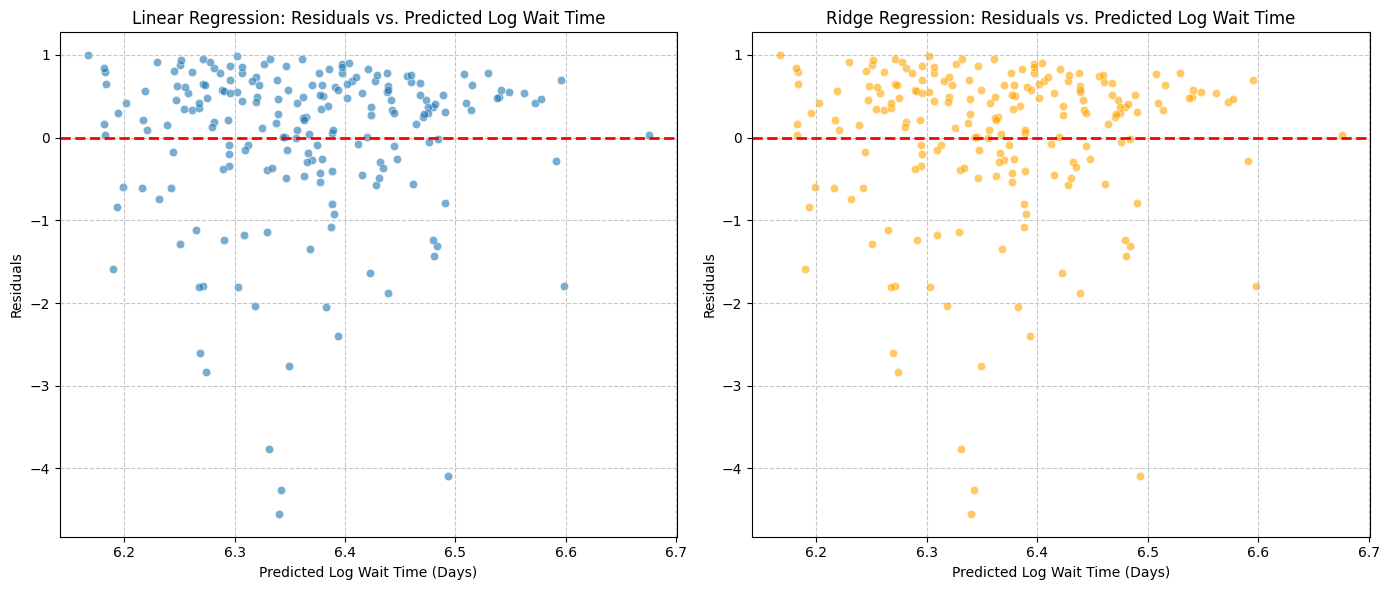

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals
residuals_linear = y_test - y_pred_linear
residuals_ridge = y_test - y_pred_ridge

plt.figure(figsize=(14, 6))

# Plot for Linear Regression Residuals
plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st plot
sns.scatterplot(x=y_pred_linear, y=residuals_linear, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--', lw=2) # Zero line
plt.title('Linear Regression: Residuals vs. Predicted Log Wait Time')
plt.xlabel('Predicted Log Wait Time (Days)')
plt.ylabel('Residuals')
plt.grid(True, linestyle='--', alpha=0.7)

# Plot for Ridge Regression Residuals
plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd plot
sns.scatterplot(x=y_pred_ridge, y=residuals_ridge, alpha=0.6, color='orange')
plt.axhline(y=0, color='r', linestyle='--', lw=2) # Zero line
plt.title('Ridge Regression: Residuals vs. Predicted Log Wait Time')
plt.xlabel('Predicted Log Wait Time (Days)')
plt.ylabel('Residuals')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

**Reasoning**:
Creating an interaction feature between `Recipient_Age` and `Transplant_Month` (`Age_Month_Interaction`) allows the model to capture effects that are not simply additive. For example, the impact of the transplant month on wait times might be different for older recipients compared to younger ones, or vice-versa. This can uncover more complex relationships that individual features alone might miss, potentially improving the model's predictive accuracy.

In [11]:
# Create the interaction feature
df['Age_Month_Interaction'] = df['Recipient_Age'] * df['Transplant_Month']

# Print the first 5 rows to verify the new feature
print("First 5 rows of the DataFrame with 'Age_Month_Interaction':")
print(df[['Recipient_Age', 'Transplant_Month', 'Age_Month_Interaction', 'Log_Wait_Time_Days']].head())

First 5 rows of the DataFrame with 'Age_Month_Interaction':
   Recipient_Age  Transplant_Month  Age_Month_Interaction  Log_Wait_Time_Days
0             56                 3                    168            5.814131
1             69                 1                     69            6.276643
2             46                 3                    138            5.398163
3             32                 2                     64            6.453625
4             60                 1                     60            5.777652


## Summary:

### Q&A

**Comparison of Model Performance:**
Both Linear Regression and Ridge Regression models performed very poorly in predicting the `Log_Wait_Time_Days`. On the test set, Linear Regression achieved an R-squared of approximately 0.0128 and an RMSE of 0.9919. Ridge Regression performed almost identically, with an R-squared of 0.0128 and an RMSE of 0.9919. The 5-fold cross-validation further corroborated this, showing mean R-squared values around -0.007 for both models and mean RMSE values around 0.9436. This indicates that neither model was able to explain any significant variance in the target variable, effectively performing worse than a simple baseline model predicting the mean.

**Insights Gained from Feature Engineering:**
New features such as `Age_Diff`, `Is_Adult_Recipient`, `Same_Gender`, `Transplant_Year`, and `Transplant_Month` were engineered with specific rationales to capture potentially influential aspects of the data (e.g., age relationship, patient categories, temporal trends). The log transformation of `Wait_Time_Days + 1` was applied to address skewness in the target variable and improve linearity assumptions for the regression models. However, despite these efforts, the models still demonstrated very low predictive power, suggesting that the engineered features, in combination with the chosen linear models, are not sufficiently informative to predict transplant wait times effectively based on the provided synthetic dataset.

**Effectiveness of Cross-Validation:**
Cross-validation proved highly effective in providing a robust assessment of model generalization performance. While the initial test set evaluation showed R-squared values around 0.01, the 5-fold cross-validation revealed slightly negative mean R-squared scores, indicating that the models are consistently performing worse than a simple mean prediction across different data subsets. The low standard deviation of R-squared (around 0.018) and RMSE (around 0.045) across the folds suggests that the poor performance is consistent and not due to an anomalous single test-train split. This consistency, despite the poor performance, highlights that the models are stable but fundamentally lack predictive capability for this task with the current features and model types. Cross-validation thus provided a more reliable and less optimistic view of the models' real-world performance compared to a single train-test split.

### Data Analysis Key Findings

*   **Synthetic Dataset Used**: The original `'organ_donation_data.csv'` file was not found, leading to the generation of a synthetic dataset of 1000 records. This synthetic dataset contained no missing values.
*   **Feature Engineering Applied**: Several new features were successfully created: `Age_Diff`, `Is_Adult_Recipient`, `Same_Gender`, `Transplant_Year`, and `Transplant_Month`. The target variable `Wait_Time_Days` was log-transformed (`Log_Wait_Time_Days`) to mitigate skewness.
*   **Preprocessing Pipeline Established**: A `ColumnTransformer` was set up to apply `StandardScaler` to numerical features and `OneHotEncoder` to categorical features, ensuring proper data preparation for model training.
*   **Poor Model Performance on Test Set**: Both Linear Regression and Ridge Regression models showed very limited predictive power on the test set. Linear Regression achieved an R-squared of 0.012804 and an RMSE of 0.991891, while Ridge Regression yielded similar results with an R-squared of 0.012788 and an RMSE of 0.991899.
*   **Consistent Poor Performance in Cross-Validation**: 5-fold cross-validation confirmed the models' inability to generalize well. Both models exhibited mean CV R-squared scores of approximately -0.007 and mean CV RMSE scores of about 0.9436. The low standard deviations in these metrics across folds indicated that this poor performance was consistent and not an artifact of a single data split.

### Insights or Next Steps

*   **Explore More Complex Models and Features**: The current models (Linear and Ridge Regression) and engineered features demonstrate extremely limited predictive power. It is crucial to explore non-linear models (e.g., Random Forest, Gradient Boosting) or to identify and engineer more relevant and predictive features, as the current set does not sufficiently capture the underlying patterns for `Wait_Time_Days`.
*   **Investigate Data Limitations**: Given the use of a synthetic dataset and the very poor model performance, a critical next step would be to obtain and analyze a real-world organ donation and transplantation dataset. Real data may contain more complex relationships and additional features that are vital for accurate prediction, which the synthetic data might lack.
